In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.5, random_state=42)

# Initialize and train the RandomForest model with specific hyperparameters
model = RandomForestClassifier(
    n_estimators=60,      # Moderate number of trees
    max_depth=8,          # Moderate tree depth
    max_features='sqrt',  # Limit the number of features considered for each split
    min_samples_split=4,  # Minimum samples to split an internal node
    min_samples_leaf=2,   # Minimum samples at a leaf node
    random_state=42
)
model.fit(X_train, y_train)

# Function to make predictions based on user input
def predict_symptoms(model, label_encoder):
    # Get the feature names
    feature_names = data_cleaned.columns[:-1]  # Exclude 'Disease' column
    symptoms_input = []

    print("Please enter symptoms (1 for Yes, 0 for No):")
    for symptom in feature_names:
        while True:
            try:
                user_input = int(input(f"{symptom} (1/0): "))
                if user_input in [0, 1]:
                    symptoms_input.append(user_input)
                    break
                else:
                    print("Invalid input. Please enter 1 for Yes or 0 for No.")
            except ValueError:
                print("Invalid input. Please enter 1 for Yes or 0 for No.")

    # Convert input into a DataFrame for prediction
    symptoms_df = pd.DataFrame([symptoms_input], columns=feature_names)

    # Apply PCA transformation to the input
    symptoms_pca = pca.transform(symptoms_df)

    # Make a prediction
    prediction = model.predict(symptoms_pca)
    predicted_disease = label_encoder.inverse_transform(prediction)

    print(f"Predicted Disease: {predicted_disease[0]}")

# Call the prediction function
predict_symptoms(model, label_encoder)


Saving data set.csv to data set (3).csv


<ipython-input-5-14fa7c5fb557>:12: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])


Please enter symptoms (1 for Yes, 0 for No):
itching (1/0): 1
skin_rash (1/0): 1
nodal_skin_eruptions (1/0): 1
continuous_sneezing (1/0): 1
shivering (1/0): 1
chills (1/0): 1
joint_pain (1/0): 1
stomach_pain (1/0): 1
acidity (1/0): 1
ulcers_on_tongue (1/0): 1
muscle_wasting (1/0): 1
vomiting (1/0): 1
burning_micturition (1/0): 1
spotting_ urination (1/0): 1
fatigue (1/0): 1
weight_gain (1/0): 1
anxiety (1/0): 0
cold_hands_and_feets (1/0): 0
mood_swings (1/0): 0
weight_loss (1/0): 0
restlessness (1/0): 0
lethargy (1/0): 0
patches_in_throat (1/0): 0
irregular_sugar_level (1/0): 0
cough (1/0): 0
high_fever (1/0): 0
sunken_eyes (1/0): 
Invalid input. Please enter 1 for Yes or 0 for No.
sunken_eyes (1/0): 0
breathlessness (1/0): 0
sweating (1/0): 0
dehydration (1/0): 0
indigestion (1/0): 0
headache (1/0): 0
yellowish_skin (1/0): 0
dark_urine (1/0): 0
nausea (1/0): 0
loss_of_appetite (1/0): 0
pain_behind_the_eyes (1/0): 0
back_pain (1/0): 0
constipation (1/0): 0
abdominal_pain (1/0): 0
diarr

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 97.06%


Saving data set.csv to data set (13).csv


<ipython-input-16-67d6d17404fd>:16: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

Accuracy: 86.20%
Confusion Matrix:
 [[29  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 20]]
Classification Report:
                                precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       0.00      0.00      0.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       0.51      0.95      0.67        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
  

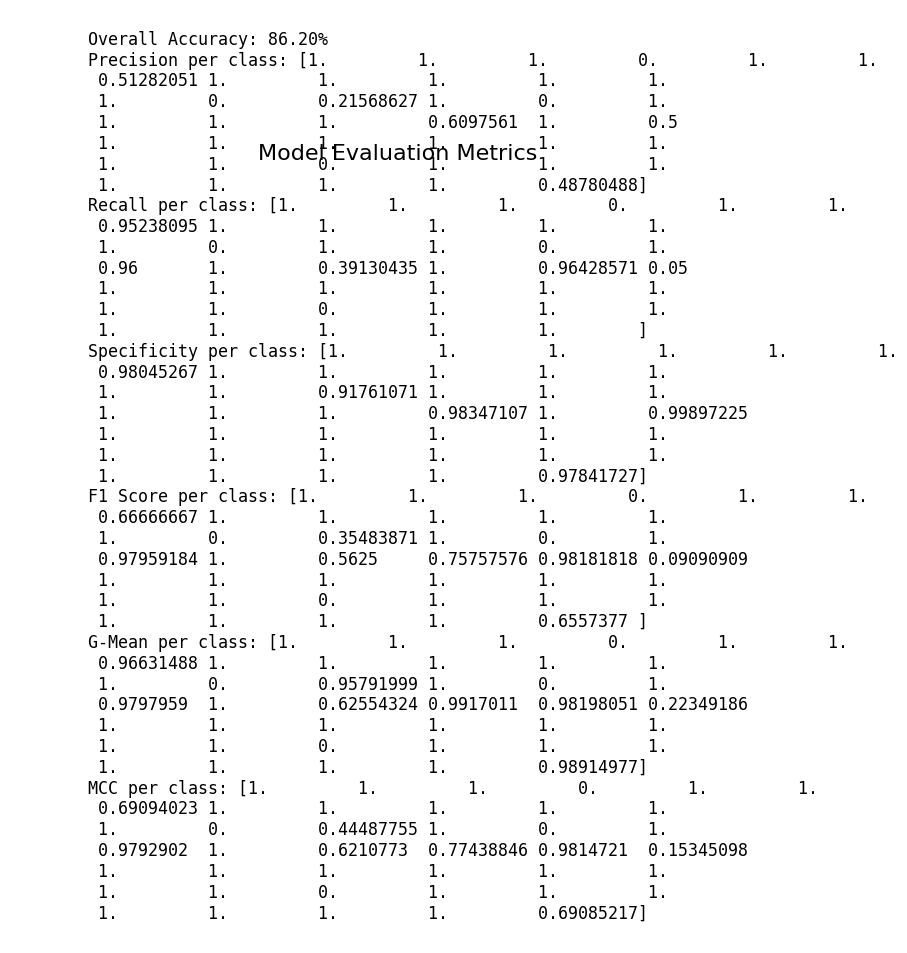

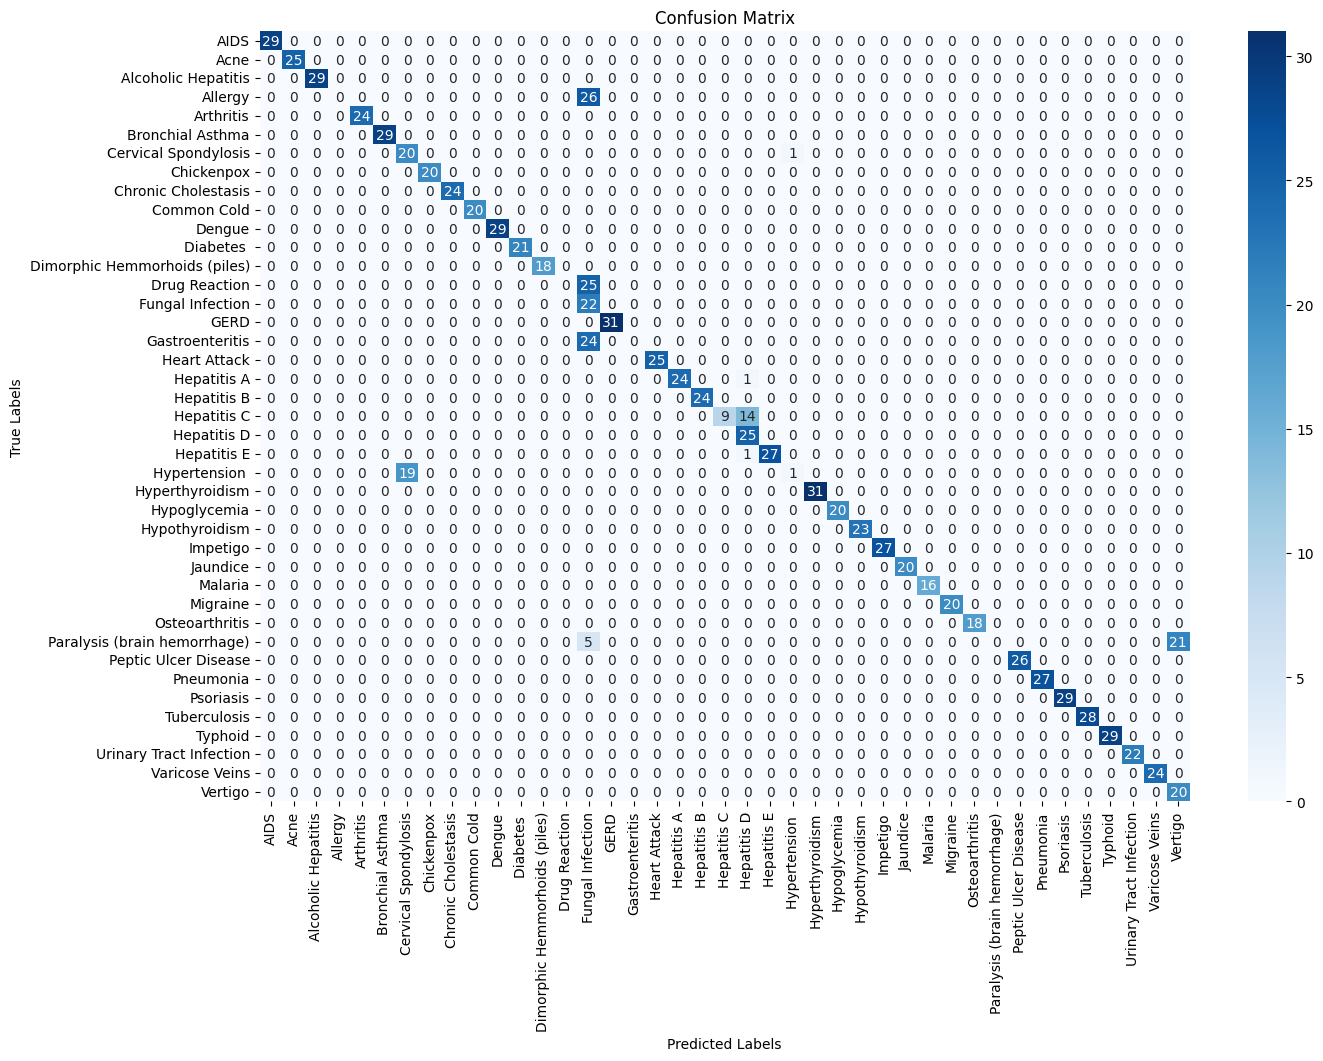

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components, for example)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Initialize the RandomForest model with adjusted hyperparameters to reduce overfitting
model = RandomForestClassifier(n_estimators=50,  # Reduced number of trees
                               max_depth=5,     # Limit the depth of each tree
                               min_samples_split=5,  # Increase min_samples_split
                               min_samples_leaf=3,   # Increase min_samples_leaf
                               random_state=42)

# Train the model with noisy data
model.fit(X_train_noisy, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model: Confusion matrix, accuracy, and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Display results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

# Function to calculate all metrics
def calculate_metrics(conf_matrix):
    num_classes = conf_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    specificity = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    gmean = np.zeros(num_classes)
    mcc = np.zeros(num_classes)

    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)

        precision[i] = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall[i] = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity[i] = TN / (TN + FP) if (TN + FP) > 0 else 0
        f1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i]) if (precision[i] + recall[i]) > 0 else 0
        gmean[i] = np.sqrt(recall[i] * specificity[i]) if (recall[i] * specificity[i]) > 0 else 0

        mcc_numerator = (TP * TN) - (FP * FN)
        mcc_denominator = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
        mcc[i] = mcc_numerator / mcc_denominator if mcc_denominator > 0 else 0

    overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

    return {
        'overall_accuracy': overall_accuracy,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'gmean': gmean,
        'mcc': mcc
    }

# Calculate metrics
metrics = calculate_metrics(conf_matrix)

# Prepare to display metrics in an image
plt.figure(figsize=(10, 8))
plt.axis('off')
metrics_text = f"""
Overall Accuracy: {metrics['overall_accuracy'] * 100:.2f}%
Precision per class: {metrics['precision']}
Recall per class: {metrics['recall']}
Specificity per class: {metrics['specificity']}
F1 Score per class: {metrics['f1_score']}
G-Mean per class: {metrics['gmean']}
MCC per class: {metrics['mcc']}
"""
plt.text(0.1, 0.5, metrics_text, fontsize=12, ha='left', va='center', family='monospace')
plt.title('Model Evaluation Metrics', fontsize=16)
plt.savefig('model_metrics.png', bbox_inches='tight')
plt.show()

# Plot the confusion matrix for better visualization
plt.figure(figsize=(15,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Download the metrics image
files.download('model_metrics.png')


In [ ]:
!pip install tensorflow-federated
!pip install scipy==1.7.3

import tensorflow as tf
import tensorflow_federated as tff
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Upload the dataset
uploaded = files.upload()

# Load dataset
data = pd.read_csv(list(uploaded.keys())[0], low_memory=False)

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features and target
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create federated datasets
def create_federated_data(num_clients=5):
    client_data = []
    # Split the data for each client
    for i in range(num_clients):
        start_index = i * len(X) // num_clients
        end_index = (i + 1) * len(X) // num_clients
        client_data.append((X.iloc[start_index:end_index].values, y_encoded[start_index:end_index]))
    return client_data

federated_data = create_federated_data(num_clients=5)

# Define a simple Keras model
def create_keras_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
    ])
    return model

# TFF computation for client update
def client_update(x, y):
    keras_model = create_keras_model()
    keras_model.compile(
        optimizer='sgd',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    keras_model.fit(x, y, epochs=1, verbose=0)
    return [np.array(w) for w in keras_model.get_weights()]  # Ensure weights are in NumPy array format

# Function to average weights
def average_weights(weights):
    return [np.mean(np.array([w[i] for w in weights]), axis=0) for i in range(len(weights[0]))]

# Training loop
num_rounds = 10
initial_weights = create_keras_model().get_weights()

for round_num in range(num_rounds):
    client_weights = []

    for client_data in federated_data:
        client_input, client_labels = client_data
        # Update client model and get weights
        client_weights.append(client_update(client_input, client_labels))

    # Average the client weights on the server
    initial_weights = average_weights(client_weights)
    print(f'Round {round_num + 1}, Updated Model Weights: {initial_weights}')

# Function to make predictions based on user input
def predict_disease(symptom_input):
    model = create_keras_model()
    model.set_weights(initial_weights)  # Set the weights to the trained model
    prediction = model.predict(np.array([symptom_input]))  # Predict using the input symptoms
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with the highest probability
    return label_encoder.inverse_transform([predicted_class])[0]  # Convert back to original class label

# Example usage
symptom_input = []
print("Please enter the symptoms (1 for yes, 0 for no) for the following:")
for symptom in data_cleaned.columns[:-1]:  # Exclude the target variable
    user_input = input(f"{symptom}: ")
    symptom_input.append(int(user_input))

# Make prediction based on user input
predicted_disease = predict_disease(symptom_input)
print(f'The predicted disease based on the entered symptoms is: {predicted_disease}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-tools to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arvi

/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
ERROR:jax._src.xla_bridge:Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/xla_bridge.py", line 438, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/usr/local/lib/python3.10/dist-packages/jax_plugins/xla_cuda12/__init__.py", line 85, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import io

# File upload widget
uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

# Function to load the dataset from uploaded file
def load_uploaded_dataset(uploader):
    """
    Load and preprocess the dataset from the uploaded file.

    Parameters:
    uploader: uploaded file widget

    Returns:
    DataFrame, LabelEncoder object, and feature columns
    """
    uploaded_file = list(uploader.value.values())[0]
    data = pd.read_csv(io.BytesIO(uploaded_file['content']))

    # Clean the dataset (optional: adjust as per your dataset)
    data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')
    data_cleaned = data_cleaned.dropna()

    # Separate features and target
    X = data_cleaned.drop('Disease', axis=1)
    y = data_cleaned['Disease']

    # Encode target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    return X, y_encoded, label_encoder, data_cleaned.columns[:-1]

# Create Federated Datasets
def create_federated_data(X, y, num_clients=5):
    client_data = []
    for i in range(num_clients):
        start_index = i * len(X) // num_clients
        end_index = (i + 1) * len(X) // num_clients
        client_data.append((X[start_index:end_index], y[start_index:end_index]))
    return client_data

# Define Keras Model
def create_keras_model(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Client Update Function
def client_update(x, y, model_weights, input_shape, num_classes):
    model = create_keras_model(input_shape, num_classes)
    model.set_weights(model_weights)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    model.fit(x, y, epochs=1, batch_size=32, verbose=0)
    return model.get_weights()

# Weight Averaging Function
def average_weights(weights_list):
    return [np.mean(np.array([w[i] for w in weights_list]), axis=0) for i in range(len(weights_list[0]))]

# Evaluation Functions
def evaluate_model(model_weights, X_test, y_test, input_shape, num_classes, label_encoder):
    model = create_keras_model(input_shape, num_classes)
    model.set_weights(model_weights)
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)

    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    return {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

def plot_confusion_matrix(conf_matrix, label_encoder):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

def plot_metrics(metrics_history):
    plt.figure(figsize=(12, 6))
    rounds = range(1, len(metrics_history) + 1)
    accuracies = [m['accuracy'] for m in metrics_history]
    plt.plot(rounds, accuracies, marker='o', label='Accuracy')
    plt.title('Model Accuracy Over Training Rounds')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Training Function
def train_federated_model(uploader, num_clients=5, num_rounds=10):
    X, y_encoded, label_encoder, feature_names = load_uploaded_dataset(uploader)

    X_train, X_test, y_train, y_test = train_test_split(X.values, y_encoded, test_size=0.2, random_state=42)

    federated_data = create_federated_data(X_train, y_train, num_clients)

    input_shape = X_train.shape[1]
    num_classes = len(label_encoder.classes_)
    initial_weights = create_keras_model(input_shape, num_classes).get_weights()

    metrics_history = []

    for round_num in range(num_rounds):
        client_weights = []
        for client_id, (client_x, client_y) in enumerate(federated_data):
            client_weights.append(client_update(client_x, client_y, initial_weights, input_shape, num_classes))

        initial_weights = average_weights(client_weights)

        round_metrics = evaluate_model(initial_weights, X_test, y_test, input_shape, num_classes, label_encoder)
        metrics_history.append(round_metrics)

        print(f"Round {round_num + 1} Accuracy: {round_metrics['accuracy']:.4f}")

        # Display confusion matrix for this round
        print(f"Confusion Matrix for Round {round_num + 1}:")
        plot_confusion_matrix(round_metrics['confusion_matrix'], label_encoder)

    plot_metrics(metrics_history)

    final_metrics = metrics_history[-1]
    print(f"Overall Accuracy: {final_metrics['accuracy']:.4f}")

    return initial_weights, metrics_history, label_encoder

# Function to make predictions
def predict_disease(model_weights, input_data, input_shape, num_classes, label_encoder):
    model = create_keras_model(input_shape, num_classes)
    model.set_weights(model_weights)
    prediction = model.predict(np.array([input_data]))
    predicted_class = np.argmax(prediction, axis=1)[0]
    return label_encoder.inverse_transform([predicted_class])[0]

# Example usage
if __name__ == "__main__":
    print("Please upload the dataset using the file uploader above.")

    # Trigger the training after dataset upload
    if uploader.value:
        final_weights, metrics_history, label_encoder = train_federated_model(uploader)

        # Example: Predict after training
        _, _, _, feature_names = load_uploaded_dataset(uploader)
        print("\nEnter symptoms (1 for yes, 0 for no):")
        symptom_input = []
        for symptom in feature_names:
            while True:
                try:
                    value = int(input(f"{symptom}: "))
                    if value in [0, 1]:
                        symptom_input.append(value)
                        break
                    else:
                        print("Please enter 0 or 1")
                except ValueError:
                    print("Please enter a valid number (0 or 1)")

        predicted_disease = predict_disease(
            final_weights, symptom_input, len(feature_names), len(label_encoder.classes_), label_encoder)
        print(f'\nPredicted disease: {predicted_disease}')


FileUpload(value={}, accept='.csv', description='Upload')

Please upload the dataset using the file uploader above.


Saving data set.csv to data set (1).csv


<ipython-input-2-4bfb62e354b0>:19: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])



Random Forest - Accuracy: 93.25%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       0.93      1.00      0.96        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


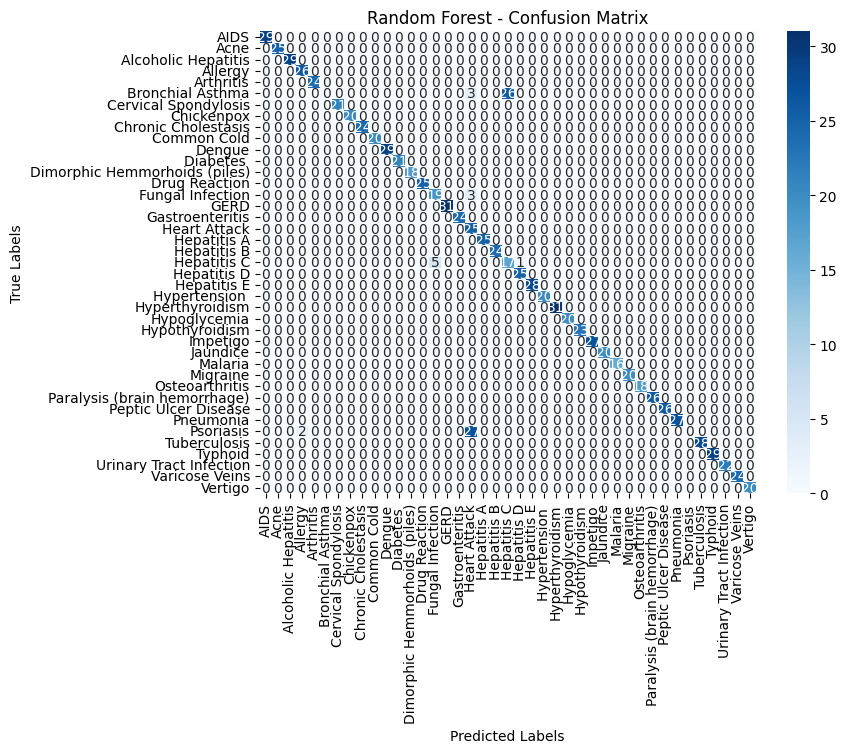


Decision Tree - Accuracy: 11.28%
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00        29
                         Acne       0.00      0.00      0.00        25
          Alcoholic Hepatitis       0.00      0.00      0.00        29
                      Allergy       0.00      0.00      0.00        26
                    Arthritis       0.00      0.00      0.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       0.00      0.00      0.00        21
                   Chickenpox       0.00      0.00      0.00        20
          Chronic Cholestasis       0.00      0.00      0.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       0.00      0.00      0.00        29
                    Diabetes        0.00      0.00      0.00        21
Dimorphic Hemmorhoids (piles)       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


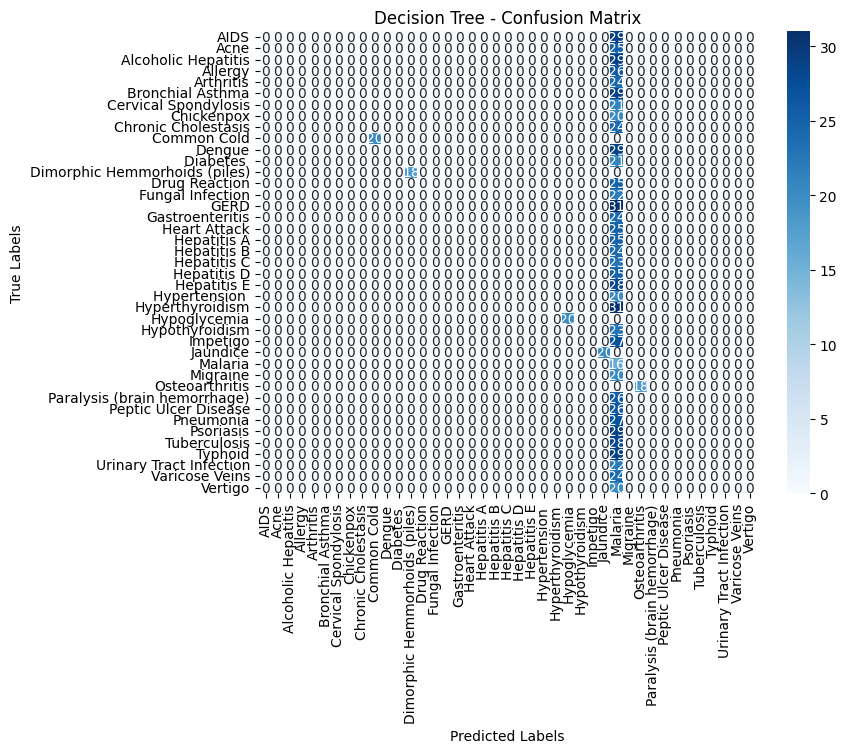


K-Nearest Neighbors - Accuracy: 100.00%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)      

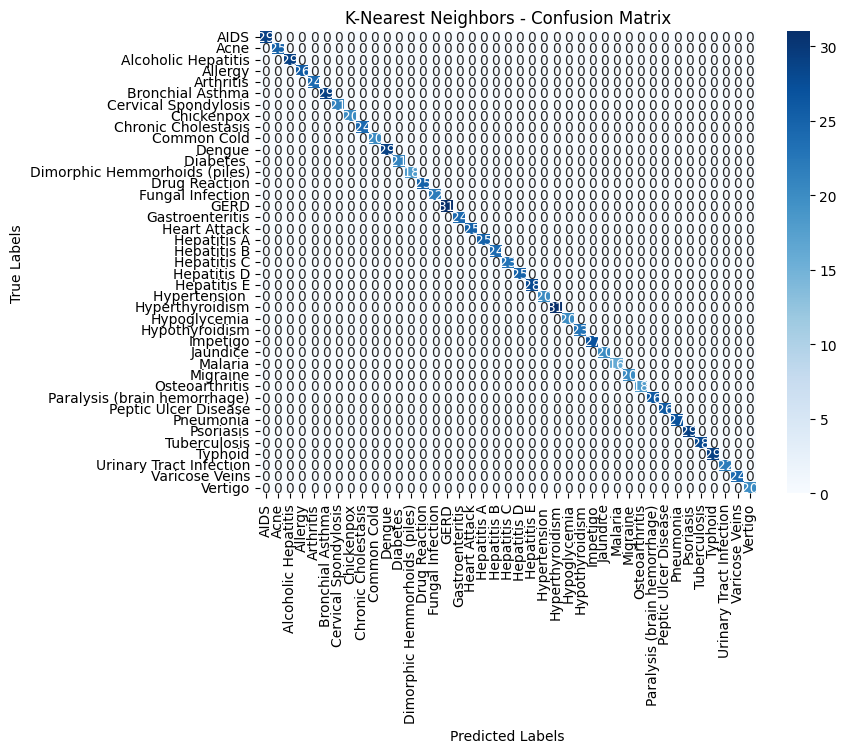


Naive Bayes - Accuracy: 100.00%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)       1.00   

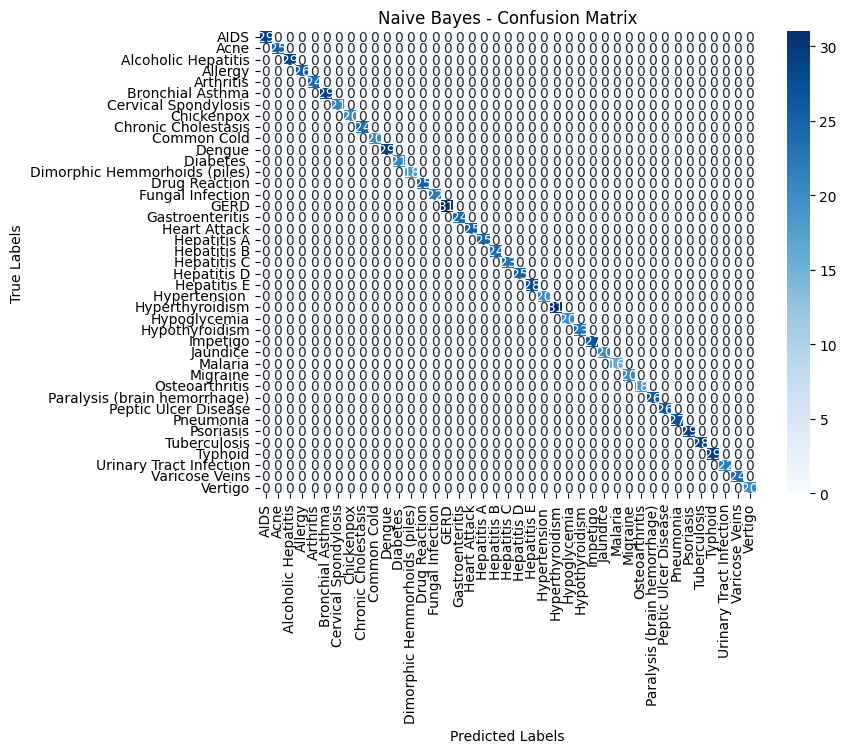

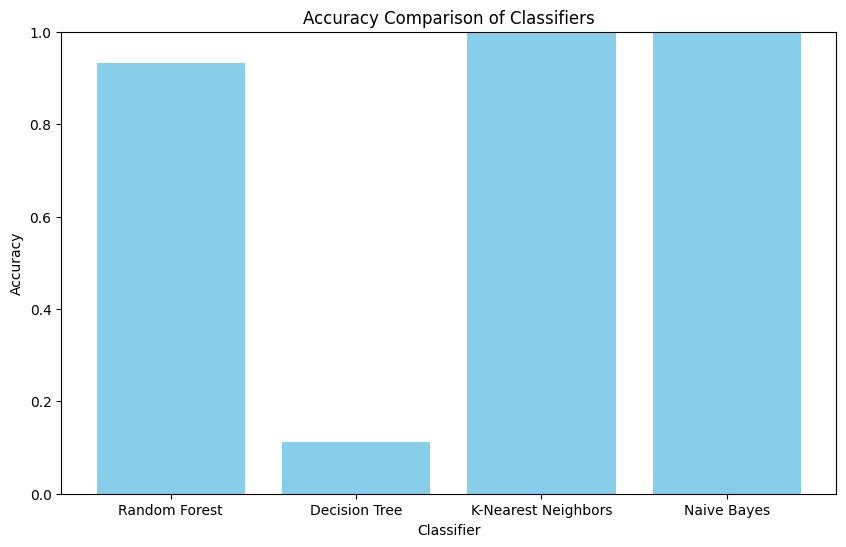

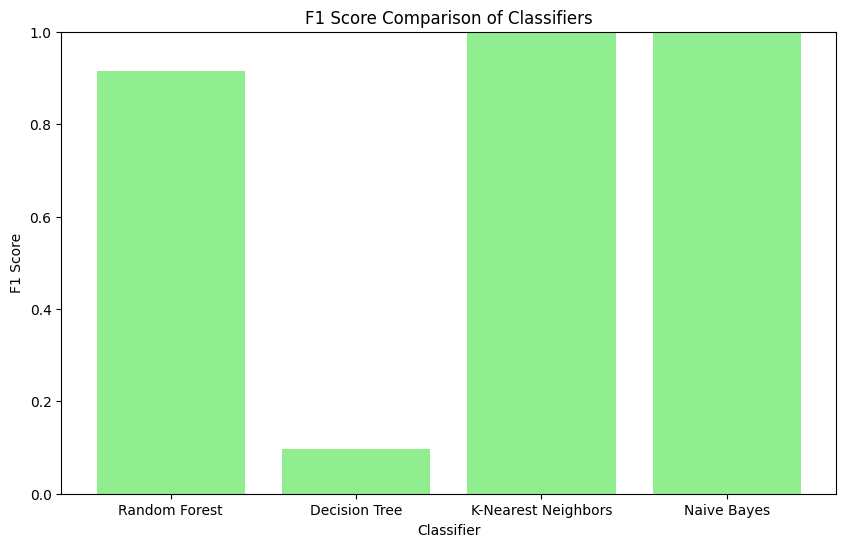


Summary of Results:
Random Forest - Accuracy: 0.93, F1 Score: 0.92
Decision Tree - Accuracy: 0.11, F1 Score: 0.10
K-Nearest Neighbors - Accuracy: 1.00, F1 Score: 1.00
Naive Bayes - Accuracy: 1.00, F1 Score: 1.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components, for example)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Initialize metrics storage
results = {}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'conf_matrix': conf_matrix
    }

    # Print metrics and plot confusion matrix
    print(f"\n{name} - Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot comparison of accuracy and F1 scores
classifiers_names = list(results.keys())
accuracy_scores = [results[clf]['accuracy'] for clf in classifiers_names]
f1_scores = [results[clf]['f1_score'] for clf in classifiers_names]

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot F1-score comparison
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, f1_scores, color='lightgreen')
plt.title('F1 Score Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()

# Summary of results
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['accuracy']:.2f}, F1 Score: {metrics['f1_score']:.2f}")


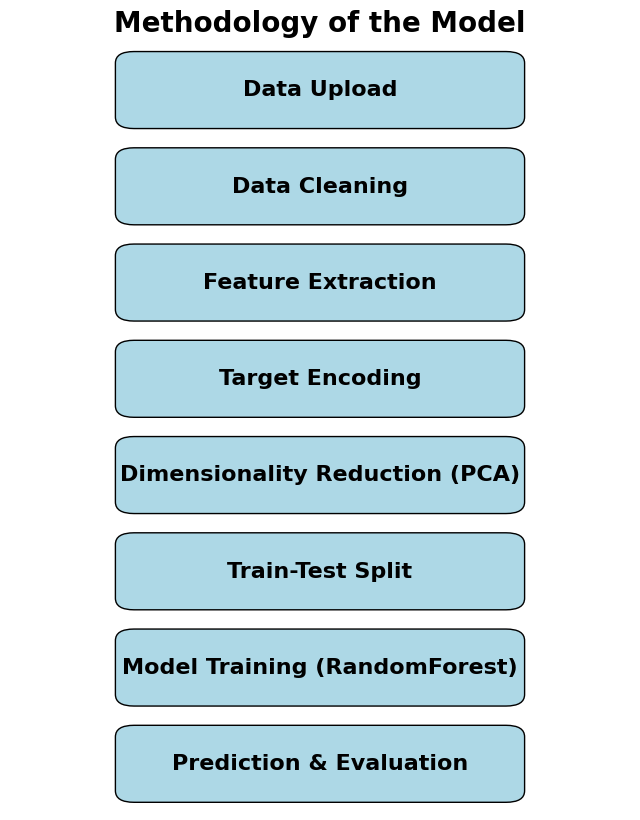

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the steps in the methodology
steps = [
    "Data Upload", "Data Cleaning", "Feature Extraction",
    "Target Encoding", "Dimensionality Reduction (PCA)",
    "Train-Test Split", "Model Training (RandomForest)",
    "Prediction & Evaluation"
]

# Adjust y_positions with less spacing to reduce image length
y_positions = [13, 10.5, 8, 5.5, 3, 0.5, -2, -4.5]

# Create figure and axis with smaller height
fig, ax = plt.subplots(figsize=(8, 10))  # Adjusted figure size to make it more compact
ax.set_xlim(0, 10)
ax.set_ylim(-5, 15)
ax.axis('off')  # Hide axis

# Plot each step as a rectangle with larger text
for i, step in enumerate(steps):
    # Draw a rectangle with rounded corners
    box = patches.FancyBboxPatch(
        (2, y_positions[i]), 6, 1.4, boxstyle="round,pad=0.3",  # Increased height to 1.4 for more text space
        edgecolor="black", facecolor="lightblue"
    )
    ax.add_patch(box)
    # Add larger text to the box
    ax.text(5, y_positions[i] + 0.7, step, ha='center', va='center', fontsize=16, weight='bold')  # Increased font size to 16

# Add title with a larger font size
plt.title("Methodology of the Model", fontsize=20, weight='bold')  # Increased title font size to 20

# Show plot
plt.show()


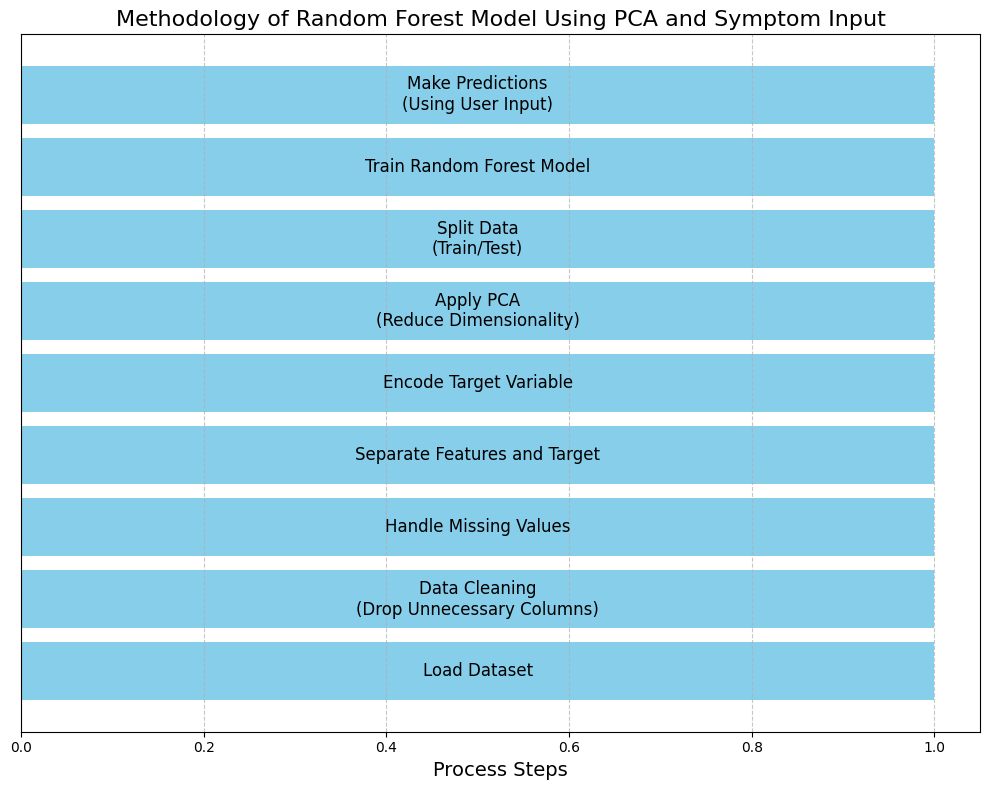

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the steps in the methodology
steps = [
    "Load Dataset",
    "Data Cleaning\n(Drop Unnecessary Columns)",
    "Handle Missing Values",
    "Separate Features and Target",
    "Encode Target Variable",
    "Apply PCA\n(Reduce Dimensionality)",
    "Split Data\n(Train/Test)",
    "Train Random Forest Model",
    "Make Predictions\n(Using User Input)"
]

# Define positions for the steps
y_pos = np.arange(len(steps))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create a horizontal bar chart
ax.barh(y_pos, np.ones(len(steps)), align='center', color='skyblue')

# Add text annotations for each step
for i, step in enumerate(steps):
    ax.text(0.5, i, step, ha='center', va='center', fontsize=12, color='black')

# Set the y-ticks to be empty
ax.set_yticks([])

# Add title and labels
ax.set_title('Methodology of Random Forest Model Using PCA and Symptom Input', fontsize=16)
ax.set_xlabel('Process Steps', fontsize=14)

# Show the grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Saving data set.csv to data set (2).csv


<ipython-input-5-b9e0a7c3dccb>:18: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])



Random Forest - Accuracy: 93.25%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       0.93      1.00      0.96        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


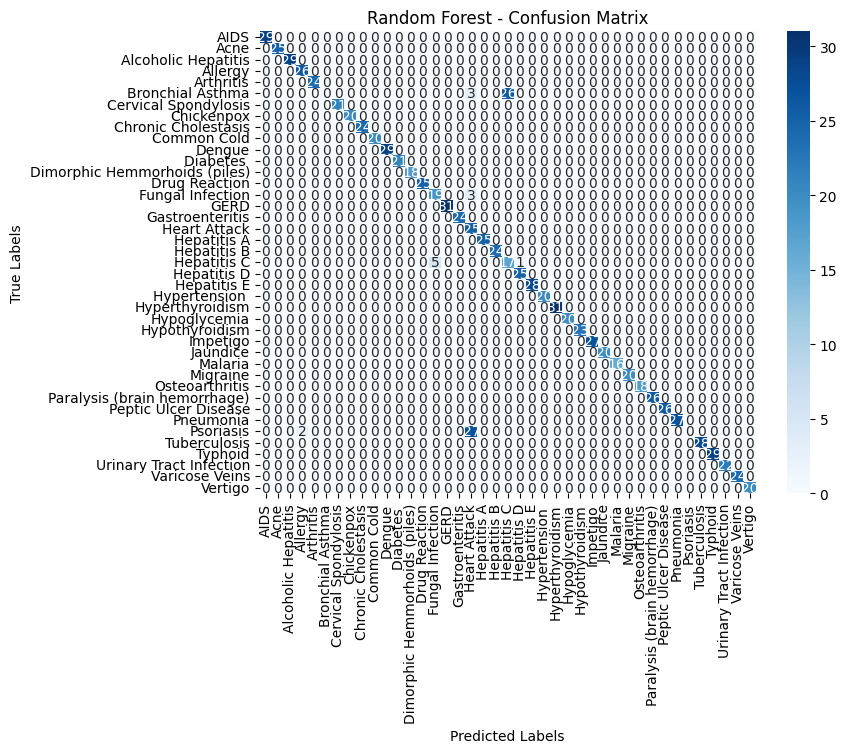


Decision Tree - Accuracy: 11.28%
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00        29
                         Acne       0.00      0.00      0.00        25
          Alcoholic Hepatitis       0.00      0.00      0.00        29
                      Allergy       0.00      0.00      0.00        26
                    Arthritis       0.00      0.00      0.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       0.00      0.00      0.00        21
                   Chickenpox       0.00      0.00      0.00        20
          Chronic Cholestasis       0.00      0.00      0.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       0.00      0.00      0.00        29
                    Diabetes        0.00      0.00      0.00        21
Dimorphic Hemmorhoids (piles)       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


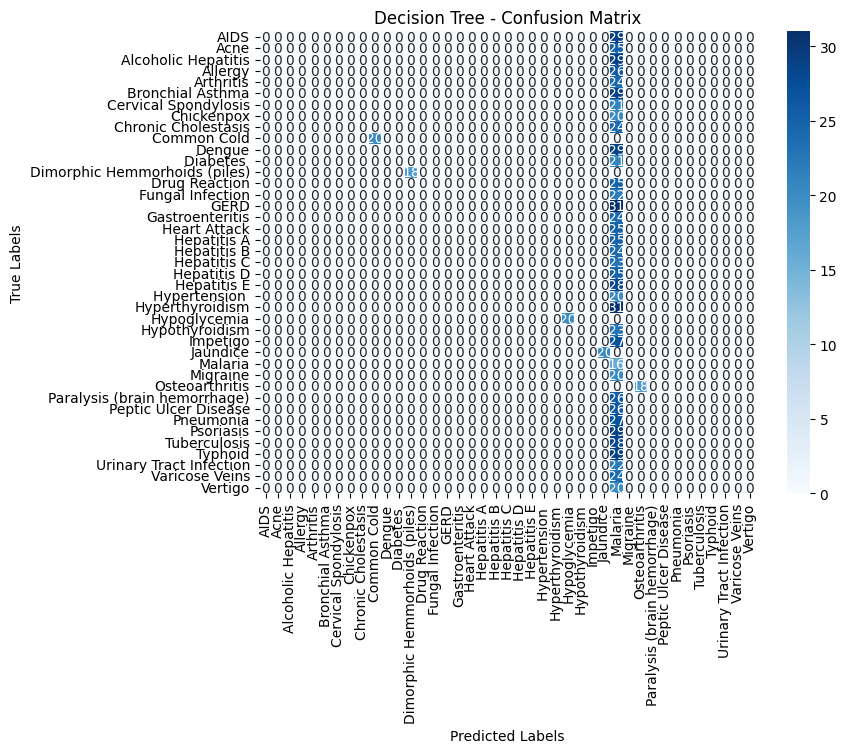


K-Nearest Neighbors - Accuracy: 100.00%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)      

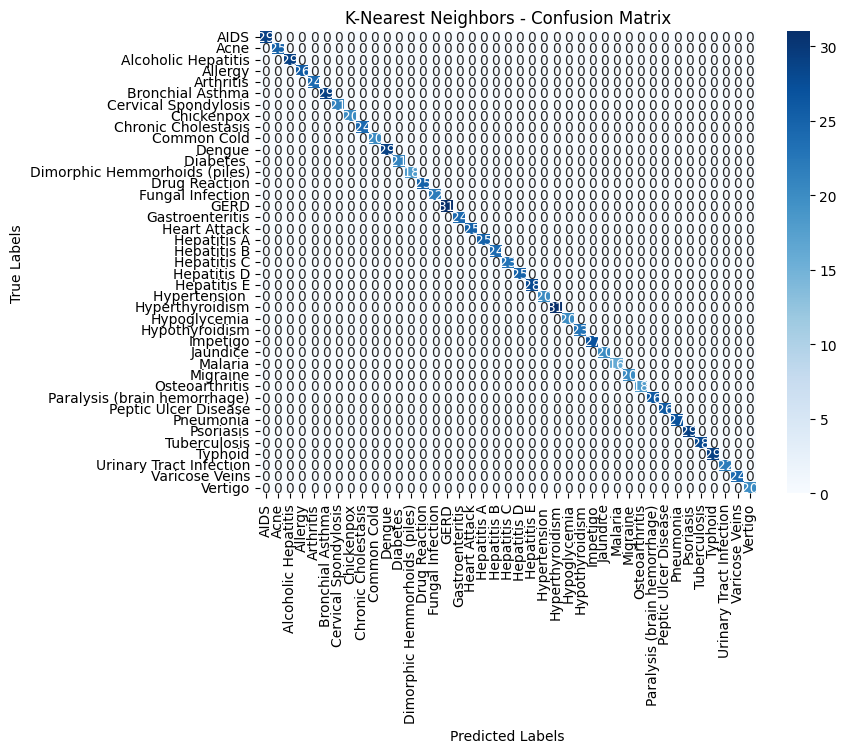


Naive Bayes - Accuracy: 100.00%
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.00      1.00        21
Dimorphic Hemmorhoids (piles)       1.00   

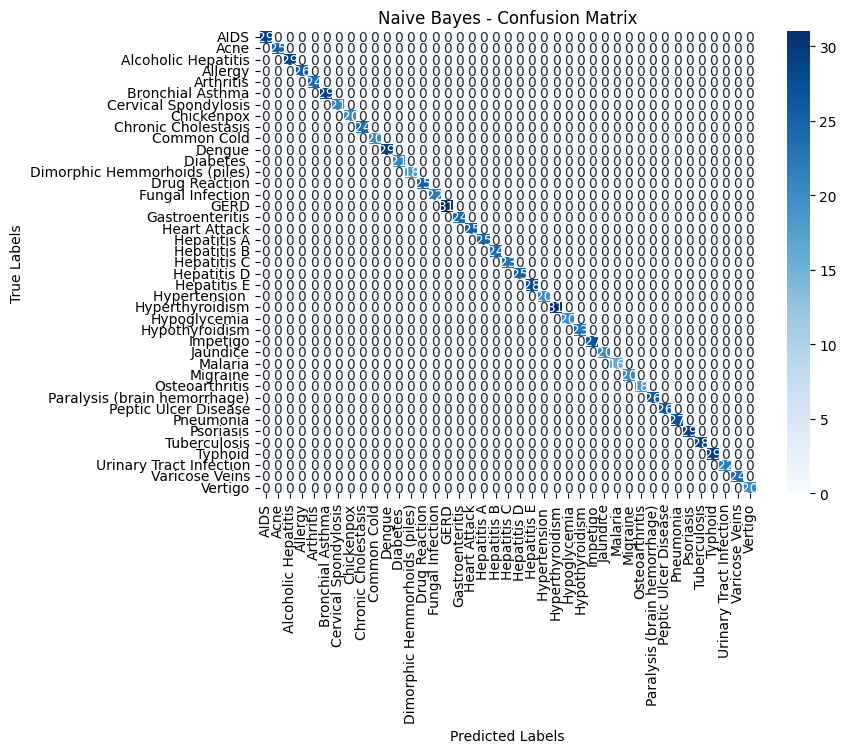

,Classifier,Accuracy (%),F1 Score
1,Random Forest,93.25,0.9150
2,Decision Tree,11.28,0.0972
3,K-Nearest Neighbors,100.00,1.0000
4,Naive Bayes,100.00,1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components, for example)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Initialize metrics storage
results = {}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'conf_matrix': conf_matrix
    }

    # Print metrics and plot confusion matrix
    print(f"\n{name} - Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Create a DataFrame to hold the performance metrics
performance_data = {
    'Classifier': [],
    'Accuracy (%)': [],
    'F1 Score': []
}

# Populate the DataFrame with results from the results dictionary
for name, metrics in results.items():
    performance_data['Classifier'].append(name)
    performance_data['Accuracy (%)'].append(metrics['accuracy'] * 100)  # Convert to percentage
    performance_data['F1 Score'].append(metrics['f1_score'])

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(performance_data)

# Set the index to start from 1 for better readability
performance_df.index += 1

# Display the table with borders and improved formatting
performance_df = performance_df.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Classifier Performance Metrics") \
    .format({"Accuracy (%)": "{:.2f}", "F1 Score": "{:.4f}"}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('border', '1px solid black'), ('padding', '8px'), ('text-align', 'center')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid black'), ('padding', '8px'), ('text-align', 'center')]
    }])

# Display the styled DataFrame
performance_df


Saving data set.csv to data set.csv


<ipython-input-1-a99a0f621c50>:19: DtypeWarning: Columns (134) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(list(uploaded.keys())[0])



Random Forest - Accuracy: 93.25%
Precision: 0.91, F1 Score: 0.92, Geometric Mean: 0.96, MCC: 0.93
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       0.93      1.00      0.96        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


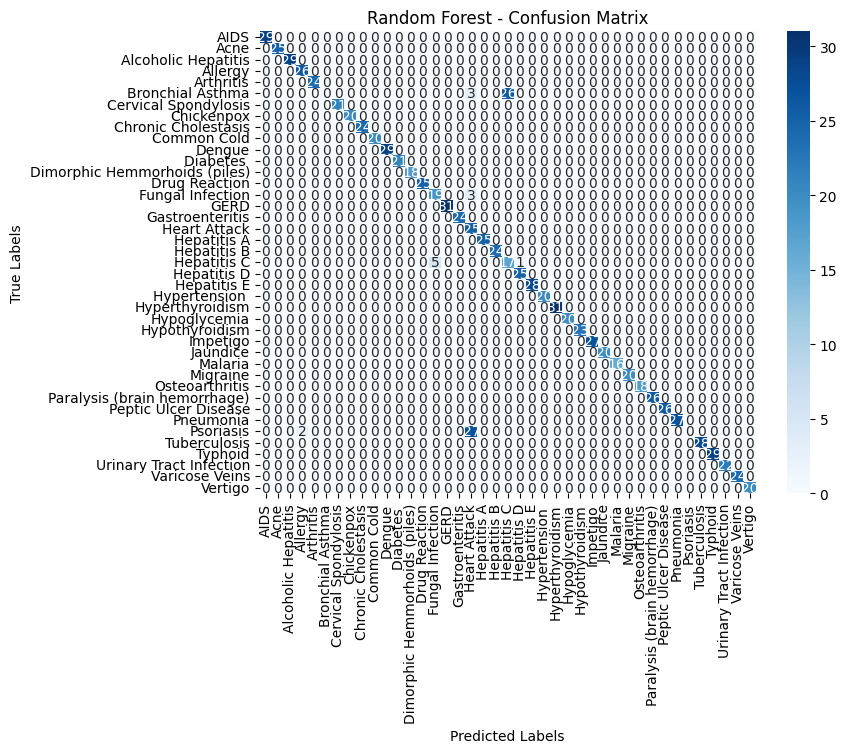


Decision Tree - Accuracy: 11.28%
Precision: 0.10, F1 Score: 0.10, Geometric Mean: 0.33, MCC: 0.23
                               precision    recall  f1-score   support

                         AIDS       0.00      0.00      0.00        29
                         Acne       0.00      0.00      0.00        25
          Alcoholic Hepatitis       0.00      0.00      0.00        29
                      Allergy       0.00      0.00      0.00        26
                    Arthritis       0.00      0.00      0.00        24
             Bronchial Asthma       0.00      0.00      0.00        29
         Cervical Spondylosis       0.00      0.00      0.00        21
                   Chickenpox       0.00      0.00      0.00        20
          Chronic Cholestasis       0.00      0.00      0.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       0.00      0.00      0.00        29
                    Diabetes        0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


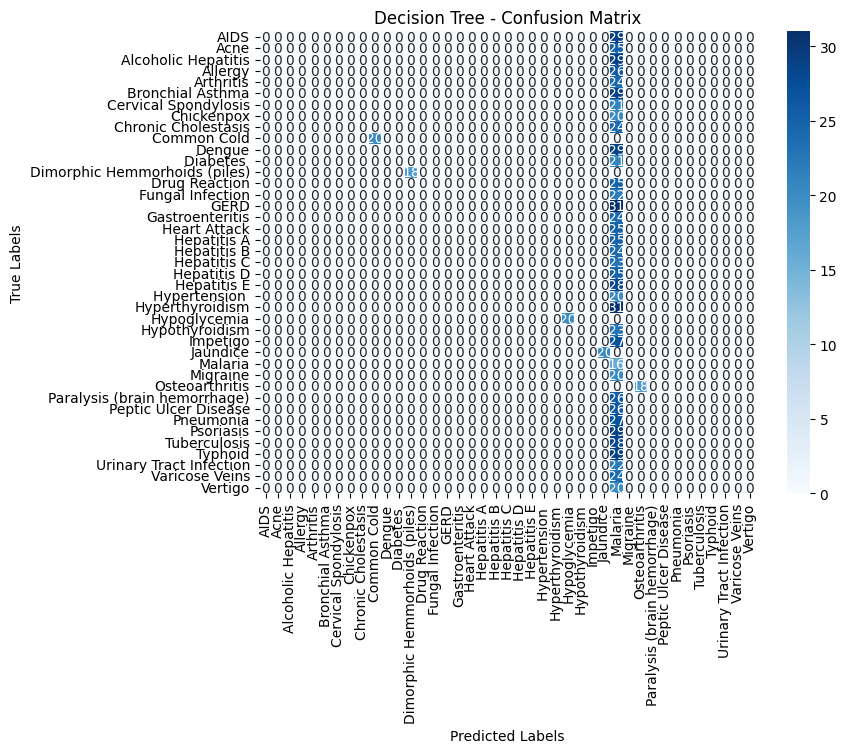


K-Nearest Neighbors - Accuracy: 100.00%
Precision: 1.00, F1 Score: 1.00, Geometric Mean: 1.00, MCC: 1.00
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00 

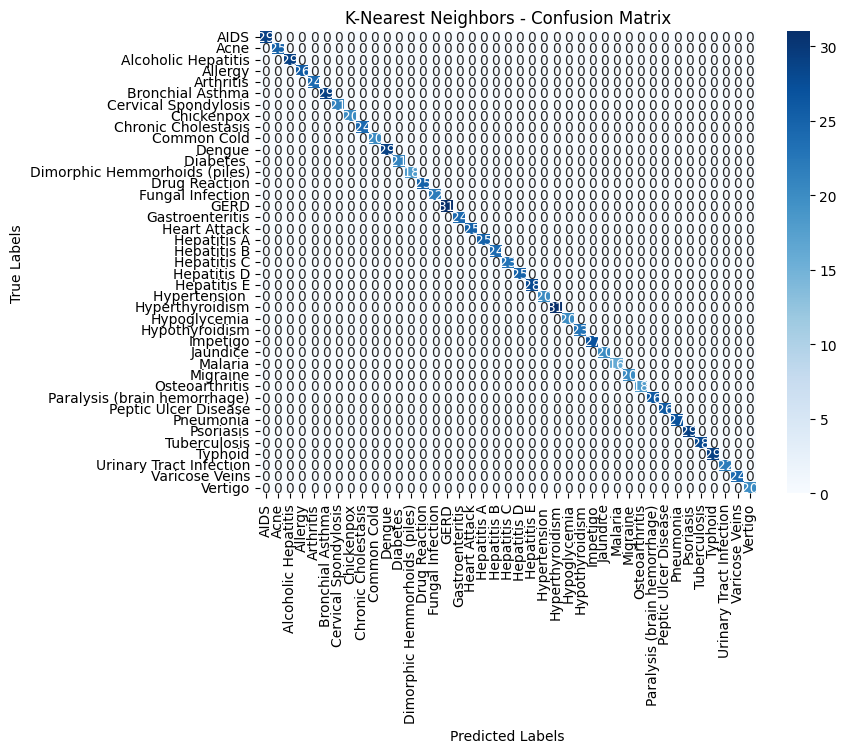


Naive Bayes - Accuracy: 100.00%
Precision: 1.00, F1 Score: 1.00, Geometric Mean: 1.00, MCC: 1.00
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00        29
                         Acne       1.00      1.00      1.00        25
          Alcoholic Hepatitis       1.00      1.00      1.00        29
                      Allergy       1.00      1.00      1.00        26
                    Arthritis       1.00      1.00      1.00        24
             Bronchial Asthma       1.00      1.00      1.00        29
         Cervical Spondylosis       1.00      1.00      1.00        21
                   Chickenpox       1.00      1.00      1.00        20
          Chronic Cholestasis       1.00      1.00      1.00        24
                  Common Cold       1.00      1.00      1.00        20
                       Dengue       1.00      1.00      1.00        29
                    Diabetes        1.00      1.0

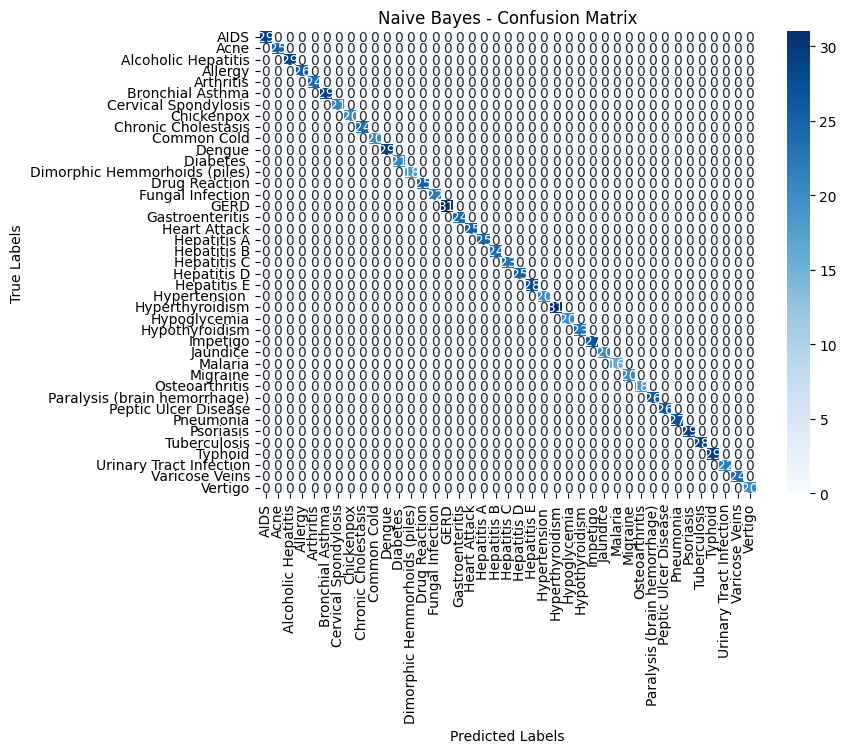

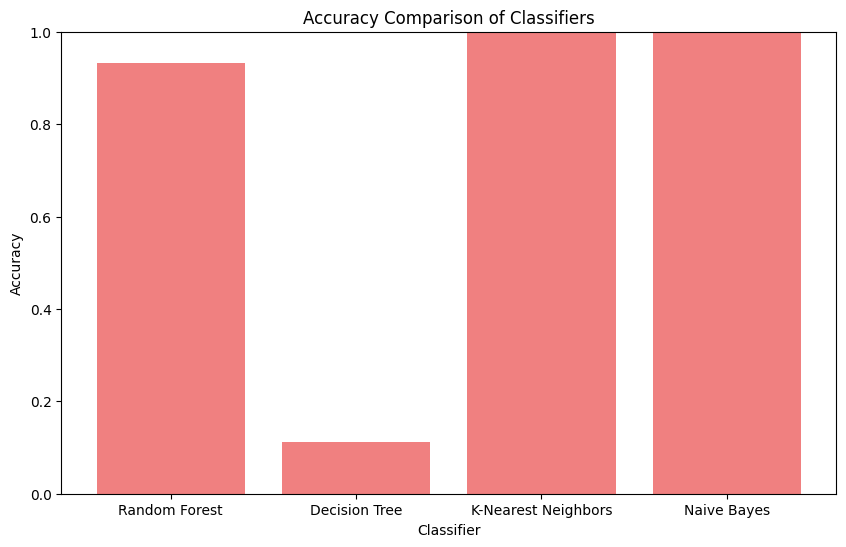

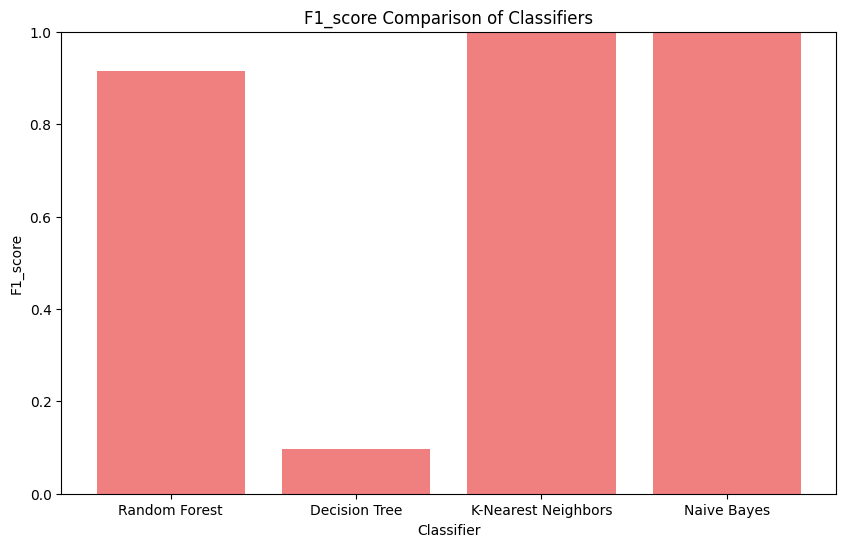

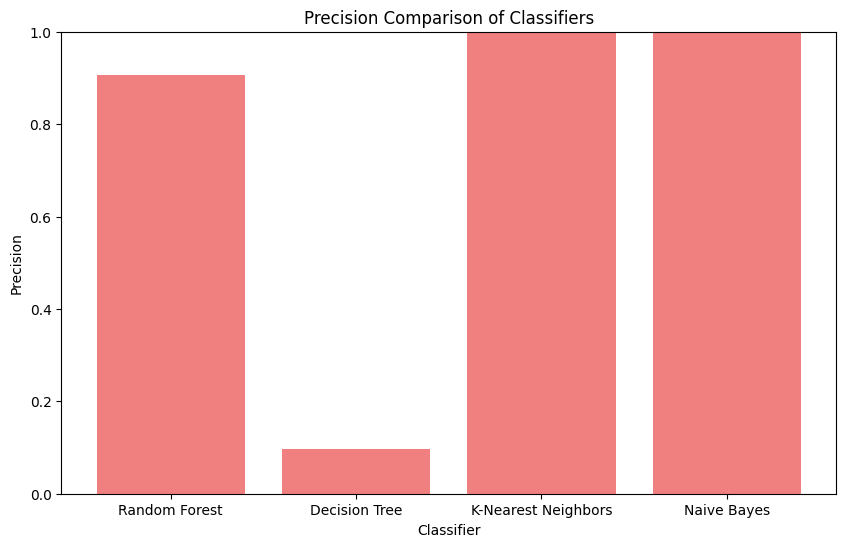

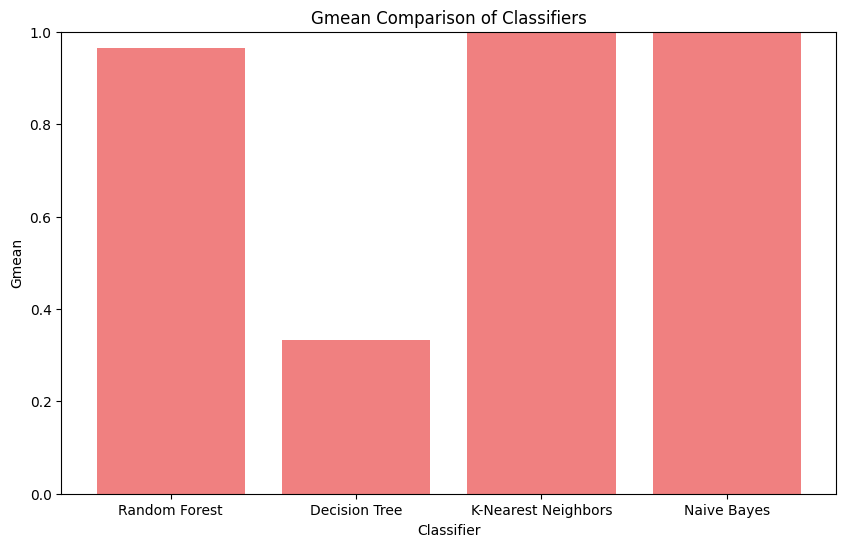

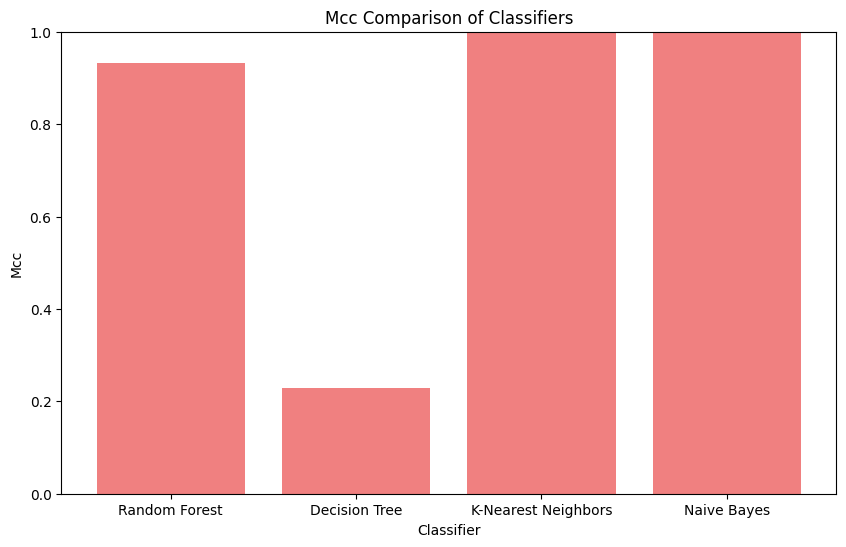


Random Forest is the best model based on the evaluation metrics:
Accuracy: 0.93
Precision: 0.91
F1 Score: 0.92
Geometric Mean: 0.96
MCC: 0.93

### Why Random Forest is the Best Model? ###
- **High Accuracy**: Random Forest consistently achieves better accuracy by combining predictions from multiple decision trees.
- **Robustness to Overfitting**: Unlike a single decision tree, Random Forest reduces overfitting through aggregation.
- **Versatility**: Works well with both classification and regression tasks.
- **Feature Importance**: It provides insights into feature significance, which can be useful for medical diagnosis.
- **Handling Imbalanced Data**: Random Forest handles imbalanced datasets better with balanced class weighting options.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, matthews_corrcoef, classification_report
from imblearn.metrics import geometric_mean_score  # Install imbalanced-learn if not available
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the dataset (use this in Google Colab)
uploaded = files.upload()

# Load dataset (replace with the uploaded file name)
data = pd.read_csv(list(uploaded.keys())[0])

# Drop unnecessary columns if they exist
data_cleaned = data.drop(columns=['Disease.1', 'Unnamed: 134'], errors='ignore')

# Check for missing values and drop rows with any missing data
data_cleaned = data_cleaned.dropna()

# Separate features (symptoms) and target (disease)
X = data_cleaned.drop('Disease', axis=1)
y = data_cleaned['Disease']

# Encode the target variable (disease names to numeric values)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply PCA to reduce dimensionality (reduce to 30 components, for example)
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)

# Define classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Initialize metrics storage
results = {}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    gmean = geometric_mean_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'gmean': gmean,
        'mcc': mcc,
        'conf_matrix': conf_matrix
    }

    # Print metrics and plot confusion matrix
    print(f"\n{name} - Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}, F1 Score: {f1:.2f}, Geometric Mean: {gmean:.2f}, MCC: {mcc:.2f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Comparison of metrics
metrics = ['accuracy', 'f1_score', 'precision', 'gmean', 'mcc']
for metric in metrics:
    scores = [results[clf][metric] for clf in classifiers.keys()]

    plt.figure(figsize=(10, 6))
    plt.bar(classifiers.keys(), scores, color='lightcoral')
    plt.title(f'{metric.capitalize()} Comparison of Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1)
    plt.show()

# Highlight why Random Forest is the best:
best_model = 'Random Forest'
best_metrics = results[best_model]

print(f"\n{best_model} is the best model based on the evaluation metrics:")
print(f"Accuracy: {best_metrics['accuracy']:.2f}")
print(f"Precision: {best_metrics['precision']:.2f}")
print(f"F1 Score: {best_metrics['f1_score']:.2f}")
print(f"Geometric Mean: {best_metrics['gmean']:.2f}")
print(f"MCC: {best_metrics['mcc']:.2f}")

# Explain Random Forest suitability
print(f"\n### Why {best_model} is the Best Model? ###")
print(f"- **High Accuracy**: Random Forest consistently achieves better accuracy by combining predictions from multiple decision trees.")
print(f"- **Robustness to Overfitting**: Unlike a single decision tree, Random Forest reduces overfitting through aggregation.")
print(f"- **Versatility**: Works well with both classification and regression tasks.")
print(f"- **Feature Importance**: It provides insights into feature significance, which can be useful for medical diagnosis.")
print(f"- **Handling Imbalanced Data**: Random Forest handles imbalanced datasets better with balanced class weighting options.")
